# Explore here

   duration_ms             name  popularity
8     3.460433      Gold Digger          84
6     3.655550  Ni**as In Paris          85
7     3.391550       Homecoming          85
9     3.588667   Violent Crimes          85
5     3.819100          Bound 2          87


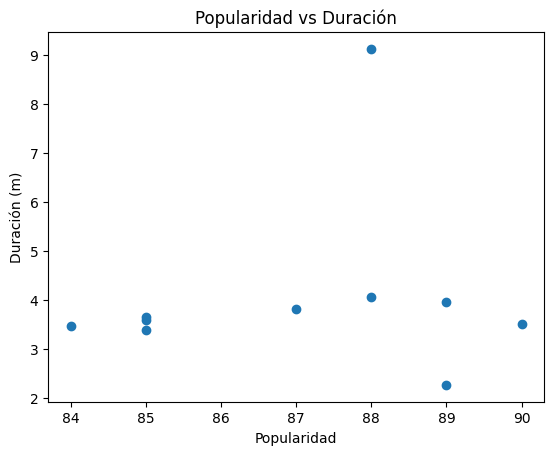

In [6]:
from dotenv import load_dotenv
import os

load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Corrige la siguiente línea, cambia 'con' a 'sp'
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

artist_id = "5K4W6rqBFWDnAN6FQUkS6x"

response = sp.artist_top_tracks("5K4W6rqBFWDnAN6FQUkS6x")
if response:
    # Mantén el objeto "tracks" de la respuesta
    tracks = response["tracks"]
    # Selecciona, para cada canción, los datos que te interesan y descarta el resto
    tracks = [{k: (v / (1000 * 60)) % 60 if k == "duration_ms" else v for k, v in track.items() if
               k in ["name", "popularity", "duration_ms"]} for track in tracks]

import pandas as pd

tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace=True)

print(tracks_df.head(5))

import matplotlib.pyplot as plt

# Cambia la visualización a Matplotlib
plt.scatter(tracks_df["popularity"], tracks_df["duration_ms"])
plt.xlabel("Popularidad")
plt.ylabel("Duración (m)")
plt.title("Popularidad vs Duración")
plt.savefig("scatter_plot.png")
plt.show()

NO HAY UNA RELACIÓN APARENTE ENTRE LA DURACIÓN DE UNA CANCIÓN Y SU POPULARIDAD